In [73]:

import pandas as pd
dr = pd.read_csv("전국 음주운전 교통사고.csv", encoding='cp949')

# 0부터 18까지의 행을 선택하고 인덱스가 1인 행을 삭제합니다
dr = dr.loc[0:18]
dr = dr.drop(1)
data = dr

data.columns = ['도시', '2018_사고', '2018_사망', '2018_부상', '2019_사고', '2019_사망', '2019_부상', '2020_사고', '2020_사망', '2020_부상', '2021_사고', '2021_사망', '2021_부상', '2022_사고', '2022_사망', '2022_부상']

# 첫 번째 행을 삭제합니다
data = data.drop(0)

# 각 연도의 데이터에서 콤마를 제거하고 정수형으로 변환합니다
for col in data.columns[1:]:
    data[col] = data[col].str.replace(',', '').astype(int)

# 인덱스를 재설정합니다
data.reset_index(inplace=True)

# 각 연도별로 부상자와 사망자 열을 생성합니다
for year in range(2018, 2023):
    injury_col = f'{year}_부상'
    death_col = f'{year}_사망'
    data[f'{year}_부상자'] = data[injury_col].astype(int)
    data[f'{year}_사망자'] = data[death_col].astype(int)

# 데이터를 재구조화하여 필요한 형태로 변경합니다
reshaped_data = data.melt(id_vars=['도시'],
                          value_vars=['2018_사고', '2019_사고', '2020_사고', '2021_사고', '2022_사고',
                                      '2018_부상자', '2019_부상자', '2020_부상자', '2021_부상자', '2022_부상자',
                                      '2018_사망자', '2019_사망자', '2020_사망자', '2021_사망자', '2022_사망자'],
                          var_name='연도', value_name='건수')

# 피벗 테이블을 이용하여 데이터를 재정렬합니다
result = reshaped_data.pivot_table(index=['도시', '연도'], columns=None, values='건수').reset_index()

# '분류' 열을 추가하고 해당 정보를 추출합니다
result['분류'] = result['연도'].str.extract(r'_(\w+)$')

# '연도' 열을 수정하여 연도 정보만 남기고 '분류'와 '연도' 열의 순서를 조정합니다
result['연도'] = result['연도'].str.split('_').str[0]
result = result[['도시', '분류', '연도', '건수']]

print(result)

     도시   분류    연도    건수
0    강원  부상자  2018  1163
1    강원   사고  2018   679
2    강원  사망자  2018    14
3    강원  부상자  2019   793
4    강원   사고  2019   492
..   ..  ...   ...   ...
250  충북   사고  2021   646
251  충북  사망자  2021     5
252  충북  부상자  2022   960
253  충북   사고  2022   599
254  충북  사망자  2022     9

[255 rows x 4 columns]


In [75]:
print(data.head(10))

   index  도시  2018_사고  2018_사망  2018_부상  2019_사고  2019_사망  2019_부상  2020_사고  \
0      2  서울     2856       27     5005     2190       13     3690     2327   
1      3  부산      743       10     1237      636       10     1009      742   
2      4  대구      890       18     1473      702       13     1209      765   
3      5  인천      938        4     1630      770        9     1273      879   
4      6  광주      675        4     1301      549        5     1007      609   
5      7  대전      594       10     1092      472        3      844      519   
6      8  울산      567       14      913      373        4      594      433   
7      9  세종       98        0      158       89        1      155       72   
8     10  경기     5090       62     8723     4140       71     6957     4495   
9     11  강원      679       14     1163      492       18      793      619   

   2020_사망  ...  2018_부상자  2018_사망자  2019_부상자  2019_사망자  2020_부상자  2020_사망자  \
0       16  ...      5005        27      3690      

In [80]:

import pandas as pd
import seaborn as sns
%matplotlib inline

data = pd.read_csv("전국 교통사고.csv").iloc[2:52, :7]
# 데이터에서 필요한 부분만을 추출하고 보기 편한 칼럼명으로 변경합니다.
data.columns = ['도시', '분류', '2018', '2019', '2020', '2021', '2022']

# 연도 칼럼에 해당하는 데이터를 정수형으로 변환하고, 쉼표(,)를 제거합니다.
years = ['2018', '2019', '2020', '2021', '2022']
data[years] = data[years].apply(lambda x: x.str.replace(',', '').astype(int))

# 데이터를 '도시'와 '분류'를 기준으로 재구성합니다.
data = data.melt(id_vars=['도시', '분류'], value_vars=years,
                 var_name='연도', value_name='교통사고 건수')
print(data.head(10))


   도시     분류    연도  교통사고 건수
0  서울  사고[건]  2018    38795
1  서울  사망[명]  2018      304
2  서울  부상[명]  2018    53751
3  부산  사고[건]  2018    11937
4  부산  사망[명]  2018      123
5  부산  부상[명]  2018    16468
6  대구  사고[건]  2018    13199
7  대구  사망[명]  2018      120
8  대구  부상[명]  2018    19332
9  인천  사고[건]  2018     7632


<ipython-input-63-d62fcdf3339a>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.lineplot(x='연도', y='교통사고 건수', hue='도시', style='도시', markers=True, data=s_city, ci=None)


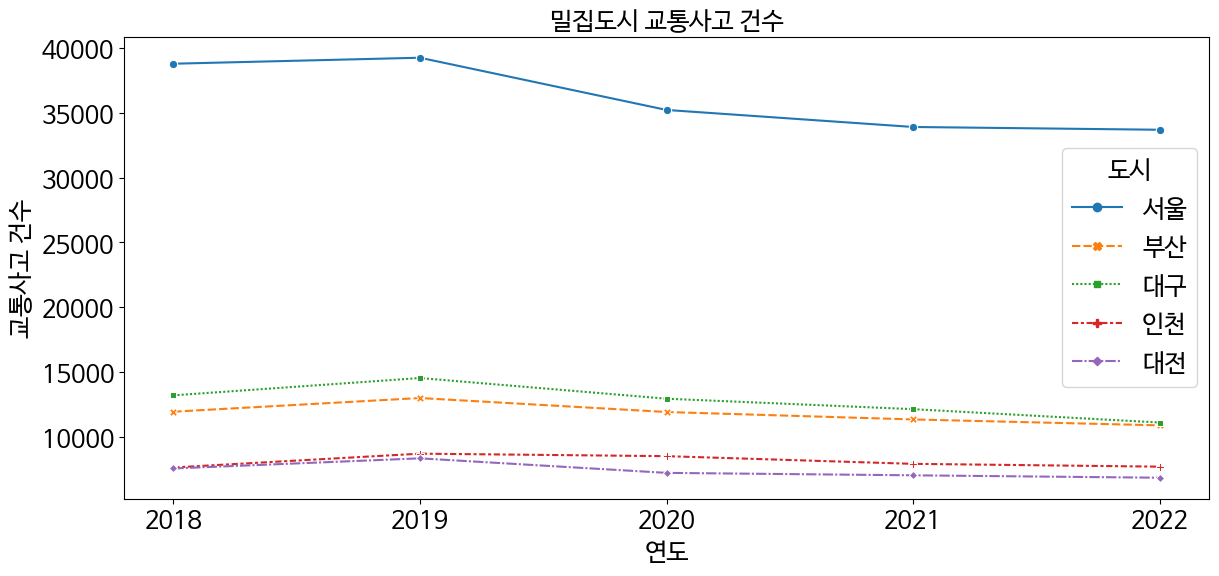

In [63]:
# 필터링
cl1 = '사고[건]'
city1 = ['인천', '서울', '대전','대구','부산']
year1 = ['2018', '2019', '2020', '2021', '2022']

s_city = data[(data['분류'] == cl1) & (data['연도'].isin(year1))& (data['도시'].isin(city1))]

plt.figure(figsize=(14, 6))
ax = sns.lineplot(x='연도', y='교통사고 건수', hue='도시', style='도시', markers=True, data=s_city, ci=None)


plt.title('밀집도시 교통사고 건수', fontsize=18, fontweight='bold')
plt.xlabel('연도')
plt.ylabel('교통사고 건수')

plt.show()


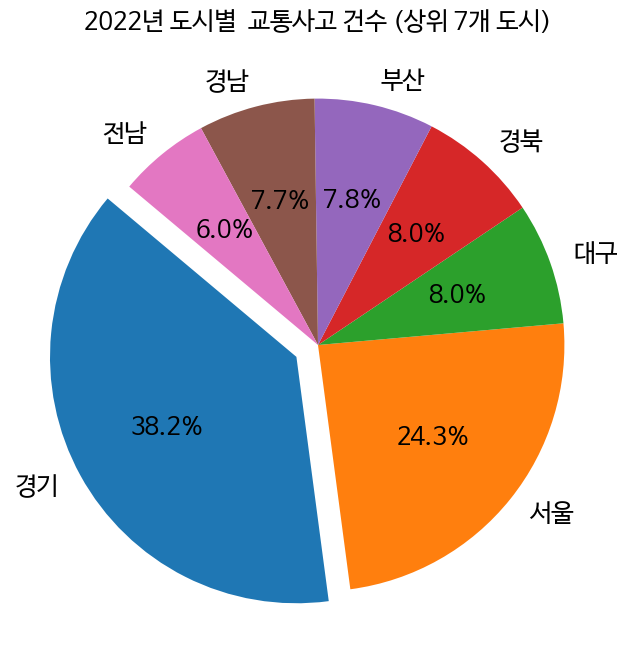

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 필터링
cl1 = '사고[건]'
year1 = ['2022']

s_city = data[(data['분류'] == cl1) & (data['연도'].isin(year1)) ]

s_city = s_city.sort_values(by='교통사고 건수', ascending=False)[0:7]


plt.figure(figsize=(10, 8))
explode = (0.1, 0, 0, 0, 0, 0, 0)
plt.pie(s_city['교통사고 건수'], labels=s_city['도시'], autopct='%1.1f%%', startangle=140, explode=explode)
plt.title('2022년 도시별  교통사고 건수 (상위 7개 도시)', fontsize=18, fontweight='bold')
plt.show()


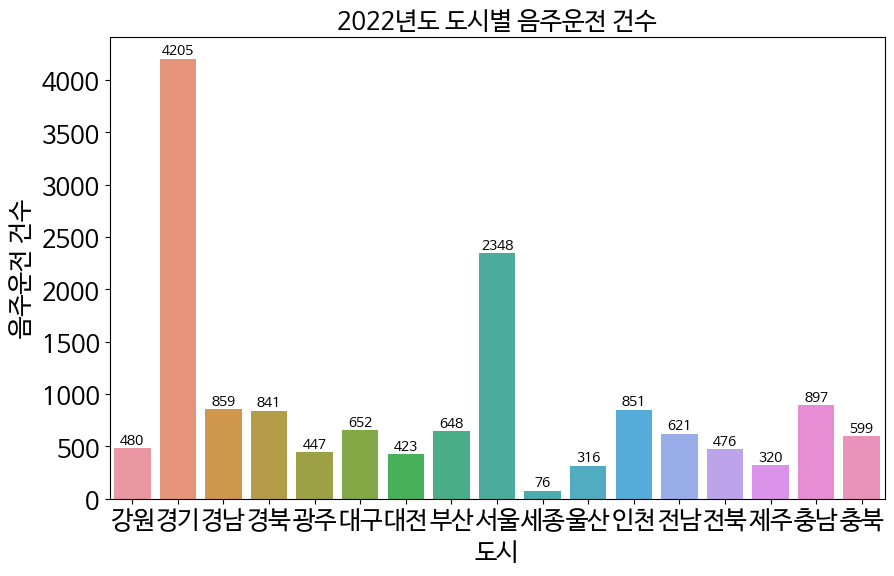

In [74]:


# 필터링
cl2 = '사고'
year2 = ['2022']
s_c = result[(result['분류'] == cl2) & (result['연도'].isin(year2))] #데이터가 2022년도 이면서 분류가 사고인 데이터만 가져옵니다.

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='도시', y='건수', data=s_c, )
#정확한 사고 건수를 파악하기 위해 바 위에 수치를 표시합니다.
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('2022년도 도시별 음주운전 건수', fontsize=18, fontweight='bold')
plt.xlabel('도시')
plt.ylabel('음주운전 건수')
plt.show()


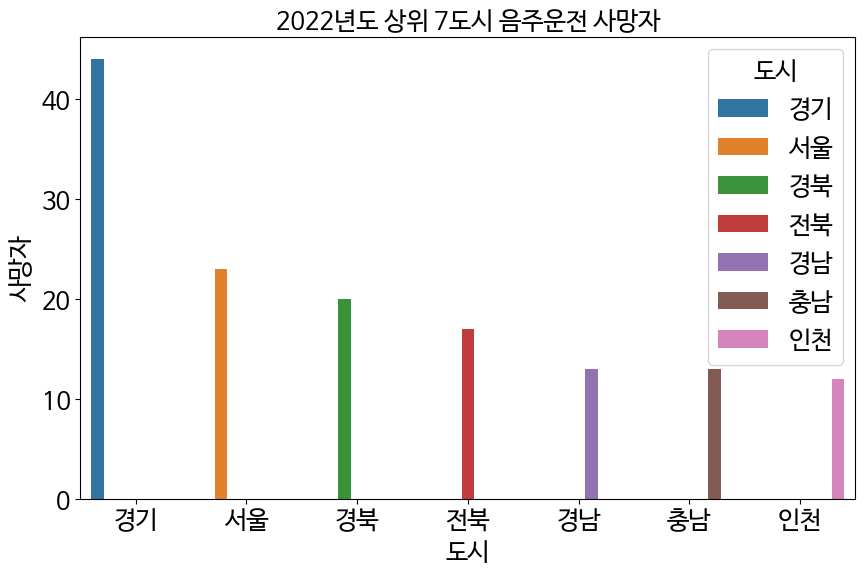

In [ ]:
#필터링
year3=['2022']
cl3 = '사망자'
top7= result['연도'].isin(year3)
top7 = result[(result['분류'] == cl3) & (result['연도'].isin(year3))]

top7 = top7.sort_values(by='건수',ascending=[False])[0:7]
top7['연도'] = top7['연도'].astype(int)

plt.figure(figsize=(10, 6))
sns.barplot(x='도시', y='건수', data=top7, hue='도시')

plt.title('2022년도 상위 7도시 음주운전 사망자', fontsize=18, fontweight='bold')
plt.xlabel('도시')
plt.ylabel('사망자')
plt.show()



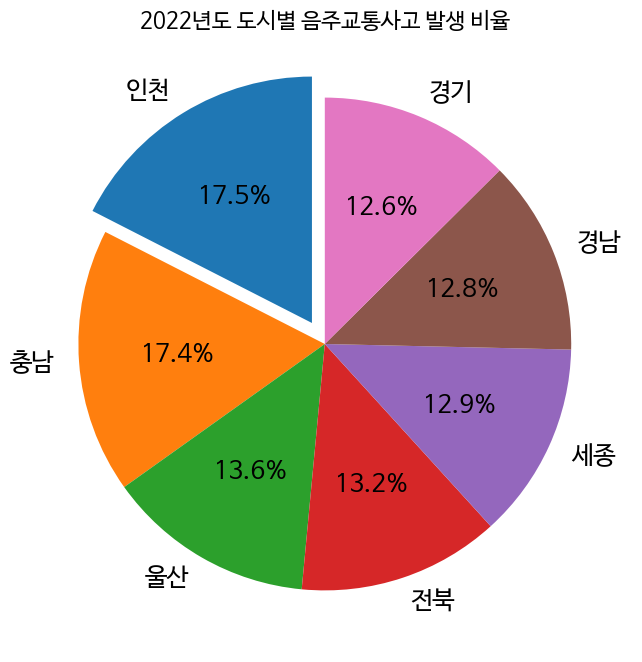

In [81]:

# '사고[건]' 분류에 해당하는 데이터 추출 합니다.
cl4 = '사고[건]'
year4 = ['2022']
pie = data[(data['분류'] == cl4) & (data['연도'].isin(year4))]

# '사고' 분류에 해당하는 결과 데이터 추출합니다.
cl5 = ['사고']
pie2 = result[(result['분류'].isin(cl5)) & (result['연도'].isin(year4))]
pie2 = pie2.rename(columns={'분류': '음주운전 분류'})

# 두 데이터프레임을 연도와 도시를 기준으로 데이터프레임을 합칩니다.
ratio = pd.merge(pie, pie2, on=['연도', '도시'], how='inner')


# 합친 데이터에서 교통사고 건수와 음주운전 건수에 비율을 구하고 소수점 두번째 밑으로는 제거합니다.
#또 도시 수가 많기 때문에 상위 7개 도시만 추출합니다.
ratio["시단위 음주교통사고 발생 비율(%)"] = ratio["건수"] / ratio["교통사고 건수"] * 100
ratio["시단위 음주교통사고 발생 비율(%)"] = ratio["시단위 음주교통사고 발생 비율(%)"].round(2)
ratio = ratio.sort_values(by='시단위 음주교통사고 발생 비율(%)', ascending=[False])[0:7]


plt.figure(figsize=(8, 8))
explode = (0.1, 0, 0, 0, 0, 0, 0)
plt.pie(ratio["시단위 음주교통사고 발생 비율(%)"], labels=ratio["도시"], autopct='%1.1f%%', startangle=90, explode=explode)
plt.title('2022년도 도시별 음주교통사고 발생 비율', fontsize=16)
plt.show()


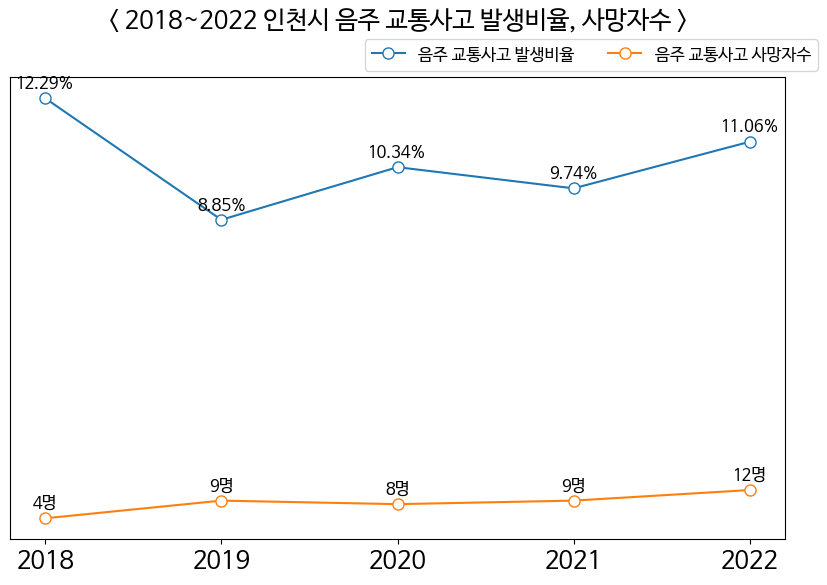

In [61]:
# 데이터 필터링
cl6 = '사고[건]'
city5 = ['인천']
year5 = ['2018', '2019', '2020', '2021', '2022']

# 2018 ~ 2022년도 까지 인천에 교통사고를 구합니다.
clas1 = data[(data['분류'] == cl6) & (data['연도'].isin(year5)) & (data['도시'].isin(city5))]

# 2018 ~ 2022년도 까지 인천 내에 음주운전 사고와 사망자를 구합니다.
cl7 = ['사고']
clas2 = result[(result['분류'].isin(cl7)) & (result['연도'].isin(year5)) & (result['도시'].isin(city5))]
clas2 = clas2.rename(columns={'분류': '음주운전 분류'})
cl8 = ['사망자']
clas3 = result[(result['분류'].isin(cl8)) & (result['연도'].isin(year5)) & (result['도시'].isin(city5))]
clas3 = clas3.rename(columns={'분류': '사망자 분류', '건수': '사망자 건수'})

# 위에서 구한 데이터를 merge로 데이터를 합칩니다.
tese3 = pd.merge(pd.merge(clas1, clas2, on=['연도', '도시'], how='inner'), clas3, on=['연도', '도시'], how='inner')

# 합친 데이터에서 교통사고 건수와 음주운전 건수에 비율을 구하고 소수점 두번째 밑으로는 제거합니다.
tese3["시단위 음주교통사고 발생 비율(%)"] = tese3["건수"] / tese3["교통사고 건수"] * 100
tese3["시단위 음주교통사고 발생 비율(%)"] = tese3["시단위 음주교통사고 발생 비율(%)"].round(2)


fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title("< 2018~2022 인천시 음주 교통사고 발생비율, 사망자수 >", pad=35, fontsize=18, fontweight='bold')
ax.plot(tese3["연도"], tese3["시단위 음주교통사고 발생 비율(%)"], marker="o", markersize=8, markerfacecolor='white', label="음주 교통사고 발생비율")
ax.plot(tese3["연도"], tese3["사망자 건수"] / 10, marker="o", markersize=8, markerfacecolor="white", label="음주 교통사고 사망자수")
ax.axes.yaxis.set_visible(False)

# 데이터를 보기 편하게 수치와 텍스트를 추가합니다.
for i in range(5):
    ax.text(i, tese3['시단위 음주교통사고 발생 비율(%)'].loc[i] + 0.3,
            f"{tese3['시단위 음주교통사고 발생 비율(%)'].loc[i]:0.2f}%",
            horizontalalignment='center', fontsize=12, fontweight='bold')
    ax.text(i, tese3['사망자 건수'].loc[i] / 10 + 0.3,
            f"{tese3['사망자 건수'].loc[i]}명",
            horizontalalignment='center', fontsize=12, fontweight='bold')

plt.legend(loc='upper center', bbox_to_anchor=(0.75, 1.1), ncol=2, fontsize=12)
plt.show()


In [ ]:
  import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
!apt-get -qq -y install fonts-nanum > /dev/null
#fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

#font = fm.FontProperties(fname=fontpath, size=9)

#fm._rebuild()



fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설


In [ ]:
import os
os.kill(os.getpid(), 9)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

# 마이너스 표시 문제
mpl.rcParams['axes.unicode_minus'] = False

# 한글 폰트 설정
fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설